## Equity Portfolio

### Pull Data from Yahoo Finance

In [ ]:
#Import libraries
import datetime, time
import yfinance as yfin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from datetime import date

pd.options.display.float_format = "{:,.6f}".format

# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

!pip install curl_cffi -U
from curl_cffi import requests
session = requests.Session(impersonate = 'chrome')

# Get Amazon, Ford and Bitcoin data
df = yfin.download(["NPN.JO", "BAW.JO", "BTC-USD"], start, end, auto_adjust = False, session = session)["Adj Close"]

df.to_csv("market_data.csv", index = False) #save to csv file, removing indexes
df.head()

In [38]:
#Summary 
df.describe()

Ticker,BAW.JO,BTC-USD,NPN.JO
count,"1,250.000000","1,827.000000","1,250.000000"
mean,"8,227.502354","30,854.084965","283,939.709650"
std,"1,594.584393","18,350.840533","54,556.359619"
min,"4,670.521973","4,970.788086","142,707.343750"
25%,"7,525.331787","13,602.354004","244,637.750000"
50%,"8,371.557617","28,033.562500","296,876.984375"
75%,"9,023.250732","43,593.824219","323,960.835938"
max,"12,766.615234","73,083.500000","407,472.562500"


#### Plot over the 2024 year

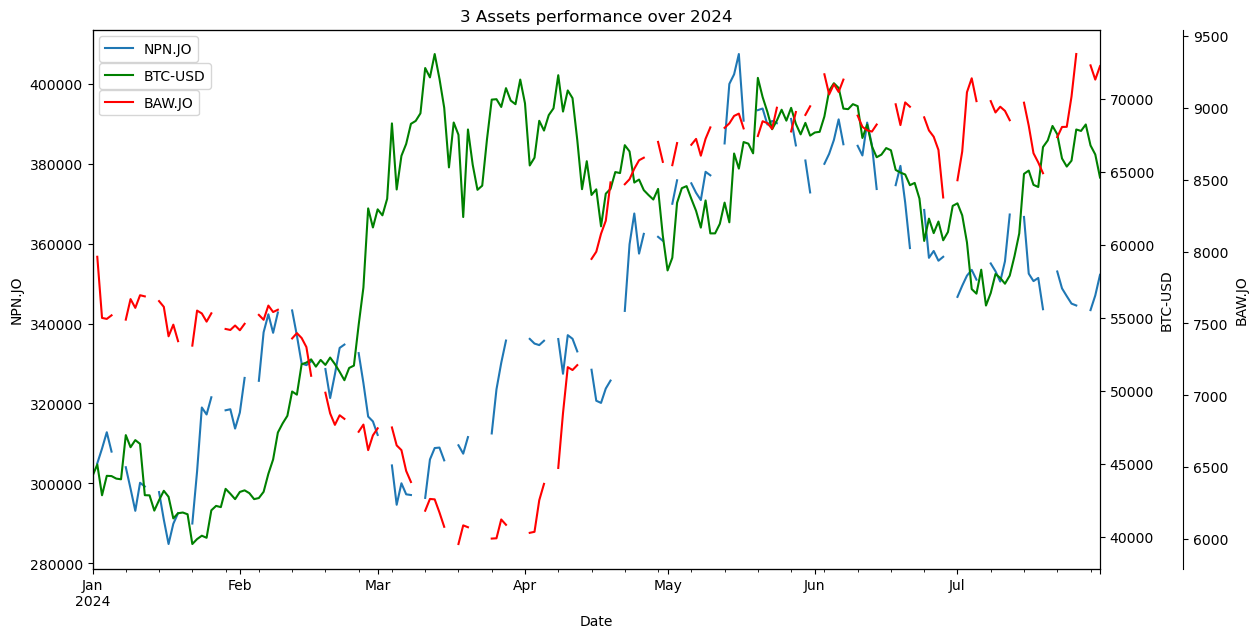

In [40]:
# Plot the three assets with the same index (x-axis) but different scale (y-axis)
fig = plt.figure(figsize = (13, 7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the data
df["2024-01-01":"2024-12-31"].plot(ax = ax1, y = 'NPN.JO' , legend = True)
df["2024-01-01":"2024-12-31"].plot(ax = ax2, y = 'BTC-USD', legend = True, color = 'g')
df["2024-01-01":"2024-12-31"].plot(ax = ax3, y = 'BAW.JO' , legend = True, color = 'r')

# We set the labels to the axes
ax1.set_ylabel('NPN.JO')
ax2.set_ylabel('BTC-USD')
ax3.set_ylabel('BAW.JO')
ax3.spines['right'].set_position(('outward', 60))

# Set position of legends
ax1.legend(['NPN.JO'] , loc = 'upper left')
ax2.legend(['BTC-USD'], loc = 'upper left', bbox_to_anchor = (0, 0.95))
ax3.legend(['BAW.JO'] , loc = 'upper left', bbox_to_anchor = (0, 0.9))

plt.title("3 Assets performance over 2024")
plt.show()

### Return on Investment